In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 


import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
warnings.filterwarnings('ignore') 


import pickle
import os

from sklearn.model_selection import train_test_split



In [2]:
# Load the dataset
df = pd.read_csv('C:\\Users\\Srijan\\Desktop\\Internship\\iris classification\\DataSet\\Iris.csv')

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
# Summary statistics of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


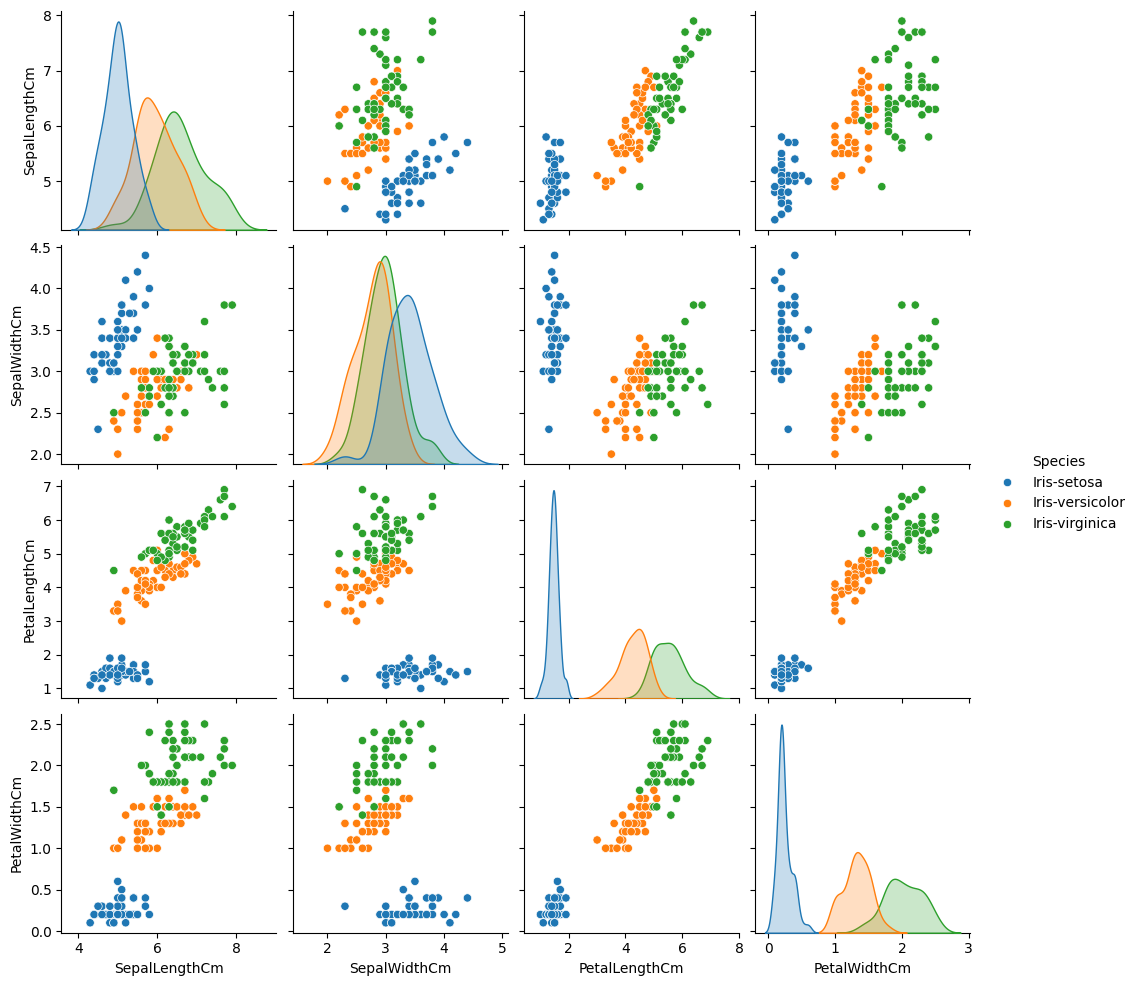

In [7]:
# Pairplot to visualize the relationships between features
sns.pairplot(df.drop('Id', axis=1), hue='Species')
plt.show()

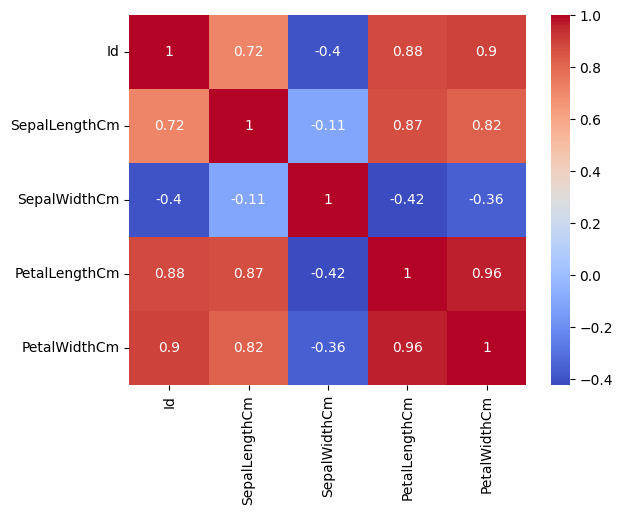

In [8]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [9]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [10]:
df.drop(columns="Id",axis=1,inplace=True)

In [11]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

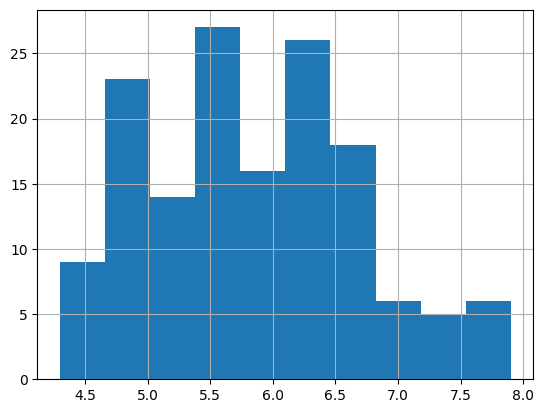

In [12]:
df["SepalLengthCm"].hist()

<Axes: >

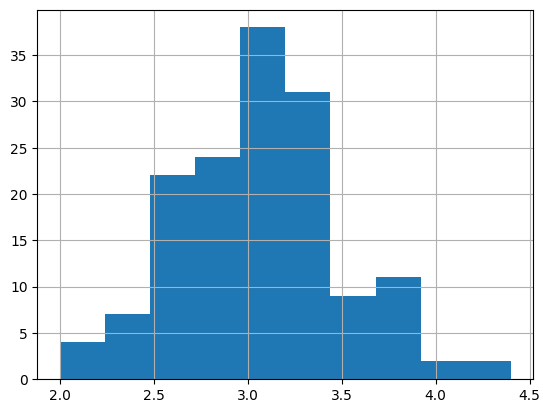

In [13]:
df["SepalWidthCm"].hist()

<Axes: >

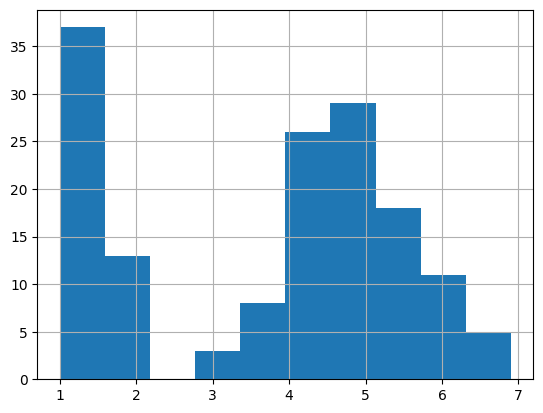

In [14]:
df["PetalLengthCm"].hist()

<Axes: >

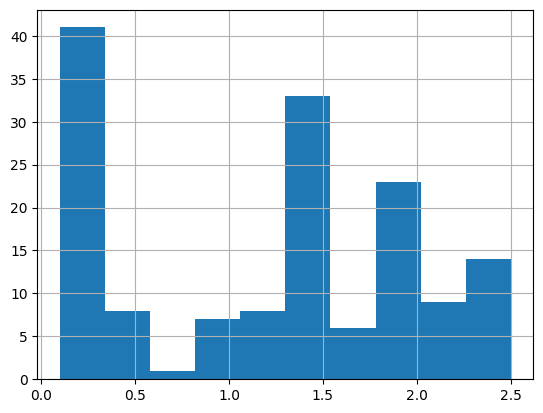

In [15]:
df["PetalWidthCm"].hist()

In [16]:
df["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [17]:
# Separate features and target  
data = df.values
X = data[:,0:4]
Y = data[:,4]

In [18]:
Y_Data = np.array([np.average(X[:, i][Y == j].astype('float32')) for i in range(X.shape[1])
                   for j in np.unique(Y)])
Y_Data_reshaped = Y_Data.reshape(len(np.unique(Y)), X.shape[1])  # Use dynamic reshape
Y_Data_reshaped = np.swapaxes(Y_Data_reshaped, 0, 1)

X_axis = np.arange(X.shape[1])  # Use the number of features here
width = 0.25

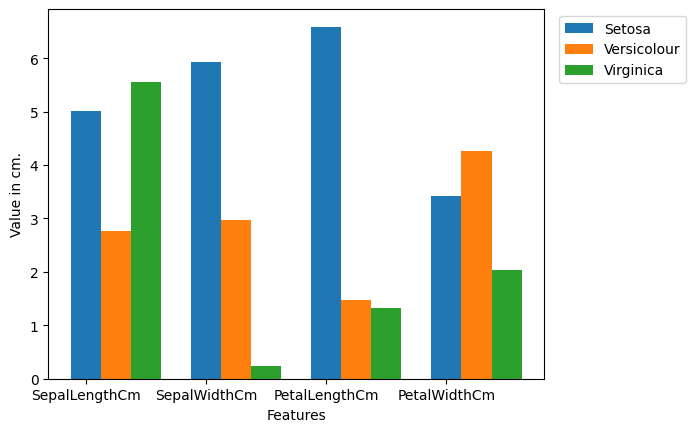

In [19]:
# Plot the average
plt.bar(X_axis, Y_Data_reshaped[:, 0], width, label='Setosa')
plt.bar(X_axis + width, Y_Data_reshaped[:, 1], width, label='Versicolour')
plt.bar(X_axis + width * 2, Y_Data_reshaped[:, 2], width, label='Virginica')

plt.xticks(X_axis, df.columns[:4])  # Assuming df contains feature names
plt.xlabel("Features")
plt.ylabel("Value in cm.")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [21]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [22]:
# Predict from the test dataset
predictions = svn.predict(X_test)


In [23]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9666666666666667

In [25]:
X_new_single = np.array([3, 5, 1, 1.1]).reshape(1, -1)
prediction_single = svn.predict(X_new_single)
predicted_species = prediction_single[0]
print("Prediction of Species: {}".format(predicted_species))

Prediction of Species: Iris-setosa


In [26]:
# Save the model
import pickle
with open('SVM.pickle', 'wb') as f:
    pickle.dump(svn, f)

In [27]:
# Load the model
with open('SVM.pickle', 'rb') as f:
    model = pickle.load(f)


In [ ]:
prediction_single = model.predict(X_new_single_reshaped)

In [28]:
predicted_species = prediction_single[0]

In [29]:
print("Prediction of Species after loading from pickle: {}".format(predicted_species))

Prediction of Species after loading from pickle: Iris-setosa


In [42]:
import base64
from PIL import Image
import io

# Function to convert image to base64
def image_to_base64(image_path):
    with open(image_path, 'rb') as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')


In [43]:
# Function to display base64 image
def display_image(base64_string):
    image_data = base64.b64decode(base64_string)
    image = Image.open(io.BytesIO(image_data))
    plt.imshow(image)
    plt.axis('off')  # Hide axis
    plt.show()


In [44]:
image_paths = {
    'Iris-setosa': r'C:\\Users\\Srijan\\Desktop\\Internship\\iris classification\\image\\Iris-setosa.png',
    'Iris-versicolor': r'C:\\Users\\Srijan\\Desktop\\Internship\\iris classification\\image\\Iris-versicolor.png',
    'Iris-virginica': r'C:\\Users\\Srijan\\Desktop\\Internship\\iris classification\\image\\Iris-virginica.png'
}


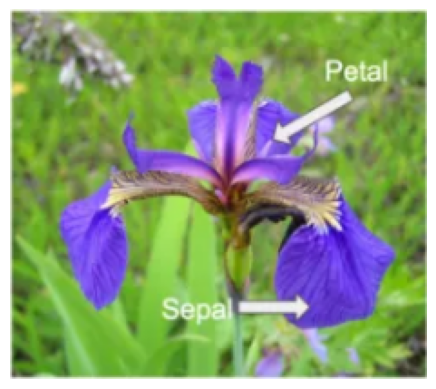

In [45]:
# Check the predicted species and display the corresponding image
if predicted_species in image_paths:
    base64_image = image_to_base64(image_paths[predicted_species])
    display_image(base64_image)
else:
    print("Image not found for the predicted species.")

In [46]:
model_and_images = {
    'model': svn,
    'image_paths': image_paths
}

In [47]:
#save the model
with open('SVM_with_images.pickle', 'wb') as f:
    pickle.dump(model_and_images, f)

In [48]:
# Load the model and image paths from the pickle file
with open('SVM_with_images.pickle', 'rb') as f:
    loaded_data = pickle.load(f)

In [49]:
model = loaded_data['model']
image_paths = loaded_data['image_paths']

In [50]:
image_paths

{'Iris-setosa': 'C:\\\\Users\\\\Srijan\\\\Desktop\\\\Internship\\\\iris classification\\\\image\\\\Iris-setosa.png',
 'Iris-versicolor': 'C:\\\\Users\\\\Srijan\\\\Desktop\\\\Internship\\\\iris classification\\\\image\\\\Iris-versicolor.png',
 'Iris-virginica': 'C:\\\\Users\\\\Srijan\\\\Desktop\\\\Internship\\\\iris classification\\\\image\\\\Iris-virginica.png'}

In [51]:
def image_to_base64(image_path):
    with open(image_path, 'rb') as image_file:
        encoded_image = base64.b64encode(image_file.read()).decode('utf-8')
    return encoded_image

In [58]:
from io import BytesIO
def display_image(base64_image):
    img_data = base64.b64decode(base64_image)
    img = Image.open(BytesIO(img_data))
    plt.imshow(img)
    plt.axis('off')  # Turn off axes
    plt.show()

In [53]:
X_new_single = np.array([3, 5, 1, 1.1]).reshape(1, -1)

In [54]:
prediction_single = model.predict(X_new_single)
predicted_species = prediction_single[0]
print("Prediction of Species: {}".format(predicted_species))

Prediction of Species: Iris-setosa


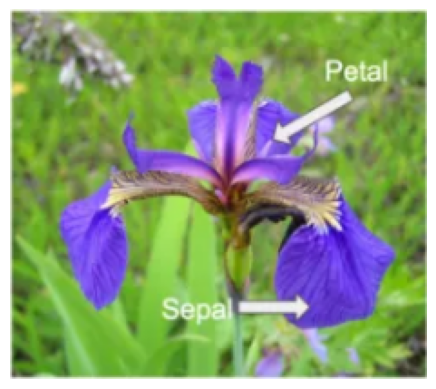

In [59]:
if predicted_species in image_paths:
    base64_image = image_to_base64(image_paths[predicted_species])
    display_image(base64_image)  # 
else:
    print("Image not found for the predicted species.")